In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
incidents_df = pd.read_csv('data/incidents_cleaned.csv')
incidents_df.head()

,Incident_ID,Customer_ID,Age,Gender,Season,Weather,Activity,Slope_Name,Slope_Difficulty,Skill_Level,Protective_Gear,Injuries,Injury_Severity,Response_Time,Hospital_Transport,Hospital_Stay_Length
0,0,2679,33,Male,Winter,Foggy,Skiing,Bunny Hill,Easy,Beginner,Helmet,Sprain,6,15,No,0
1,1,4257,36,Female,Summer,Sunny,Hiking,Devil’s Drop,Expert,Beginner,Helmet,Fracture,6,23,No,0
2,2,7924,47,Female,Winter,Foggy,Snowboarding,Thunder Run,Advanced,Beginner,Helmet,Sprain,8,13,Yes,1
3,3,7224,56,Male,Summer,Sunny,Hiking,Thunder Run,Advanced,Intermediate,Helmet,Fracture,5,9,No,0
4,4,9785,17,Male,Summer,Windy,Climbing,Blue Ridge,Intermediate,Beginner,Unknown,Head Injury,8,10,Yes,4


In [8]:
def categorize_severity(value):
    if 1 <= value <= 3:
        return "Light"
    elif 4 <= value <= 6:
        return "Medium"
    elif 7 <= value <= 10:
        return "Critical"
    else:
        return "Unknown"  # For any out-of-range or missing data

incidents_df['Severity_Category'] = incidents_df['Injury_Severity'].apply(categorize_severity)


In [10]:
incidents_df.drop(columns=['Injury_Severity'], inplace=True)
incidents_df.head()

,Incident_ID,Customer_ID,Age,Gender,Season,Weather,Activity,Slope_Name,Slope_Difficulty,Skill_Level,Protective_Gear,Injuries,Response_Time,Hospital_Transport,Hospital_Stay_Length,Severity_Category
0,0,2679,33,Male,Winter,Foggy,Skiing,Bunny Hill,Easy,Beginner,Helmet,Sprain,15,No,0,Medium
1,1,4257,36,Female,Summer,Sunny,Hiking,Devil’s Drop,Expert,Beginner,Helmet,Fracture,23,No,0,Medium
2,2,7924,47,Female,Winter,Foggy,Snowboarding,Thunder Run,Advanced,Beginner,Helmet,Sprain,13,Yes,1,Critical
3,3,7224,56,Male,Summer,Sunny,Hiking,Thunder Run,Advanced,Intermediate,Helmet,Fracture,9,No,0,Medium
4,4,9785,17,Male,Summer,Windy,Climbing,Blue Ridge,Intermediate,Beginner,Unknown,Head Injury,10,Yes,4,Critical


C:\Users\quydu\AppData\Local\Temp\ipykernel_18824\1814035779.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x="Severity_Category", y=col, data=incidents_df, estimator=np.mean, ci="sd", ax=axes[1])


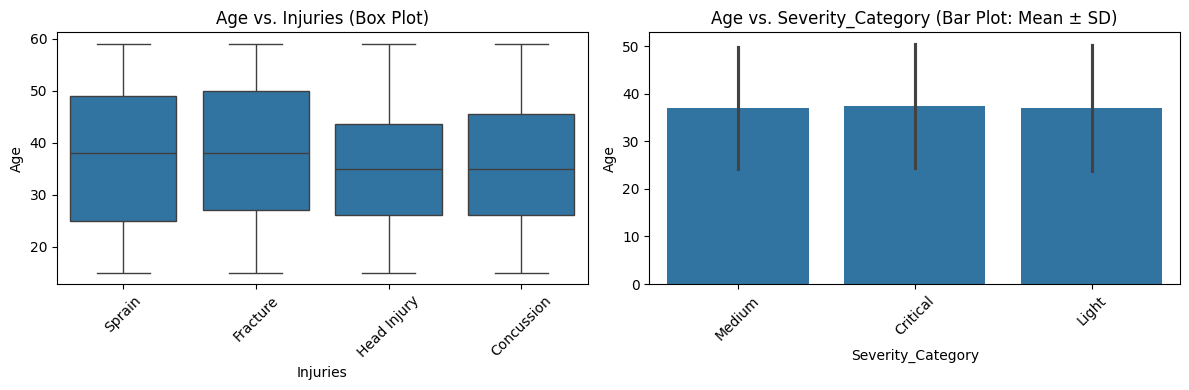

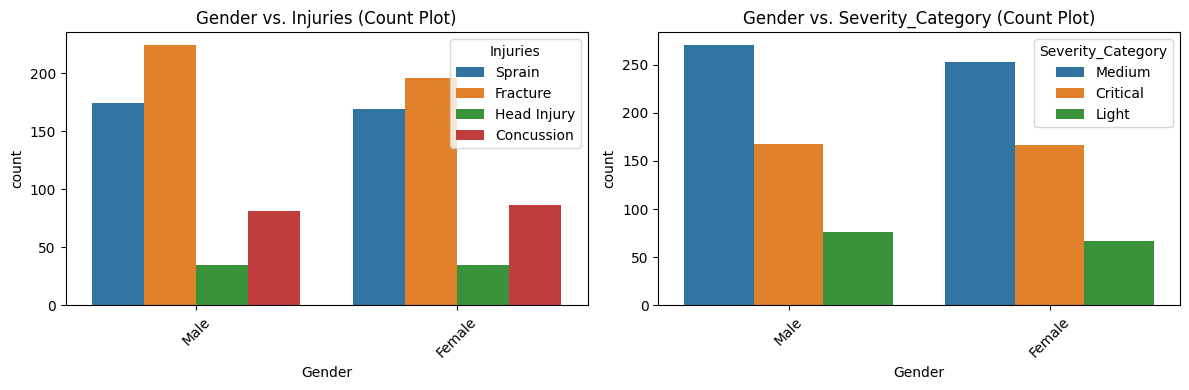

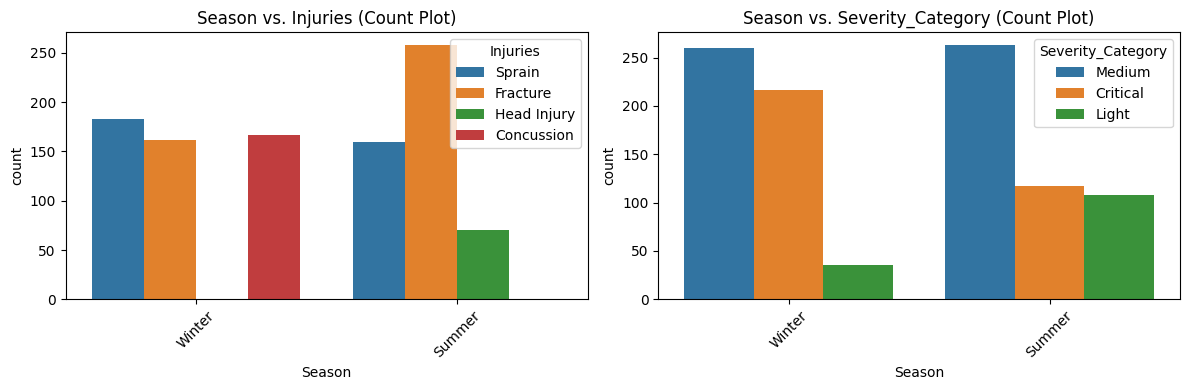

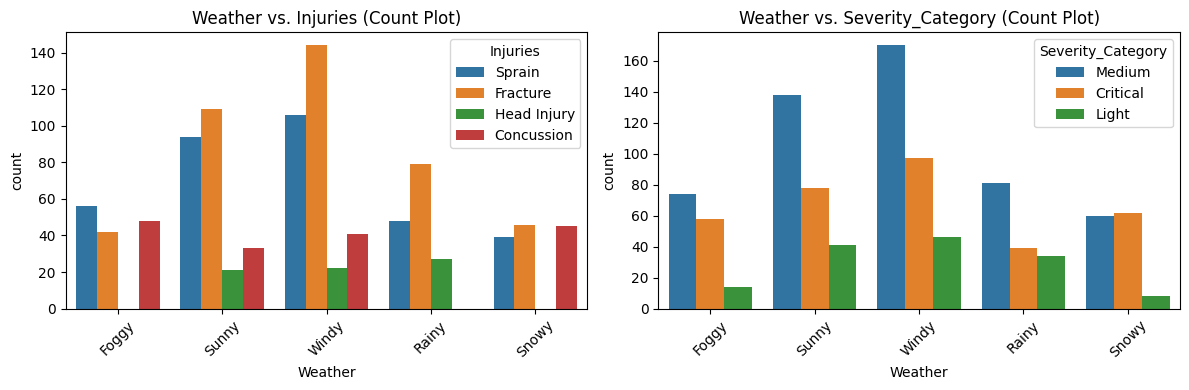

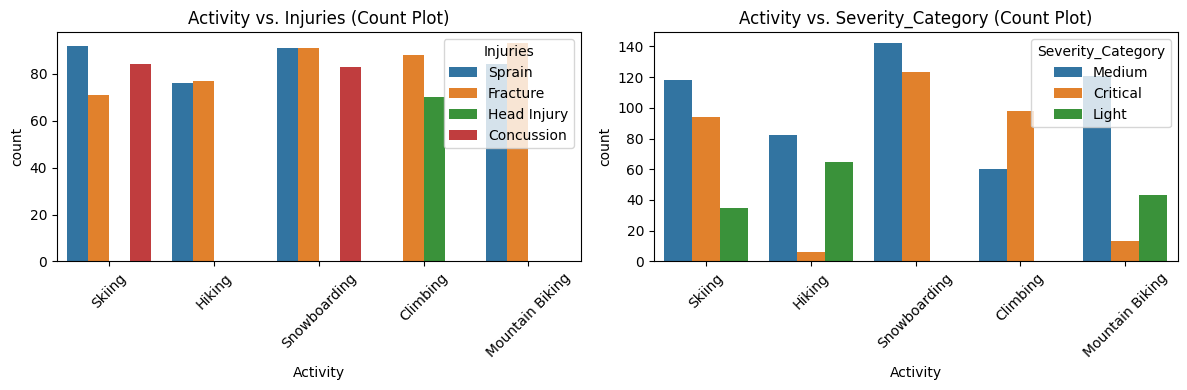

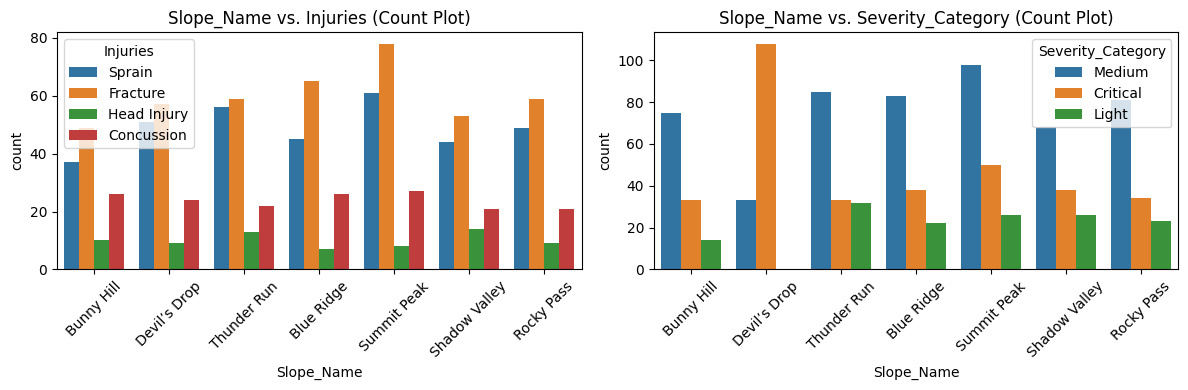

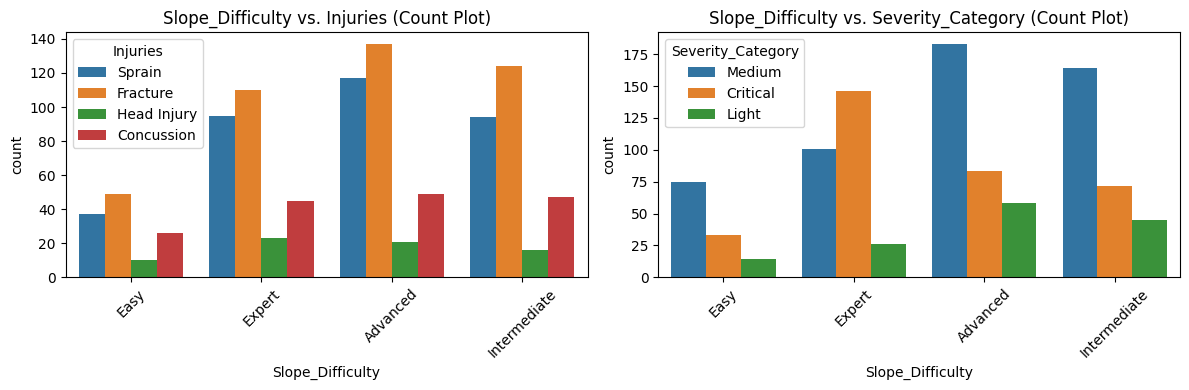

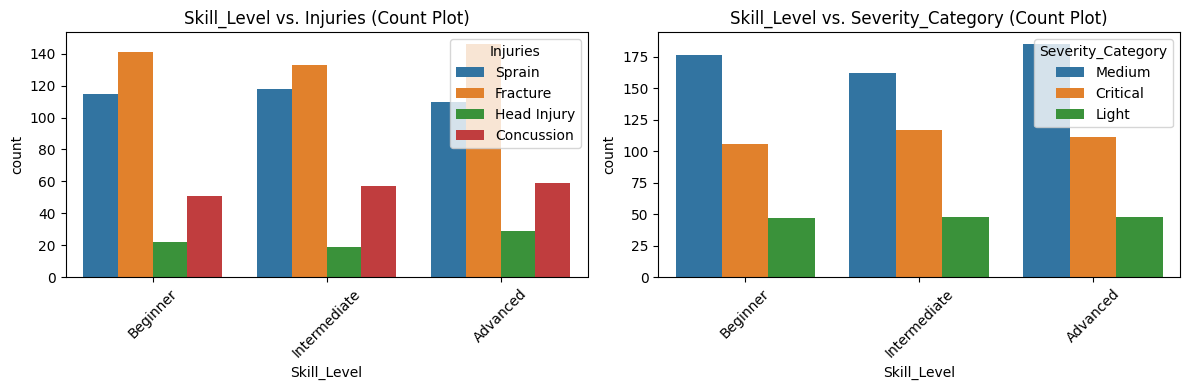

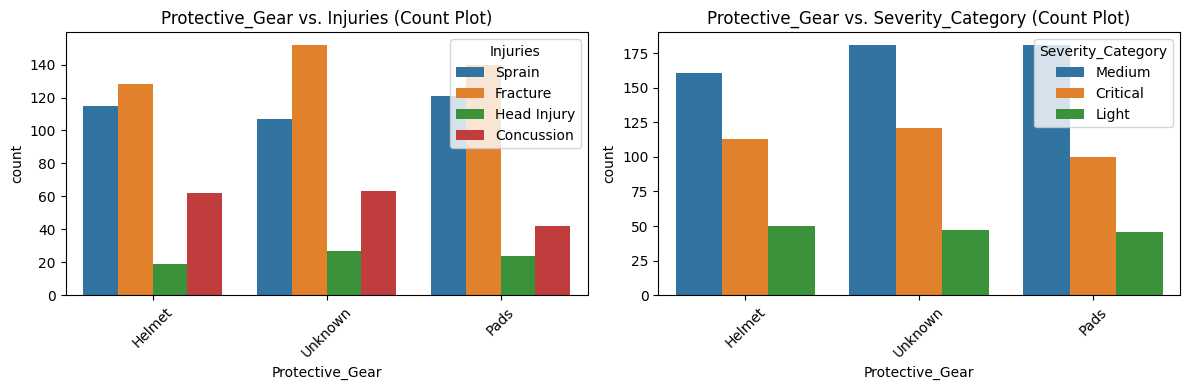

C:\Users\quydu\AppData\Local\Temp\ipykernel_18824\1814035779.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x="Severity_Category", y=col, data=incidents_df, estimator=np.mean, ci="sd", ax=axes[1])


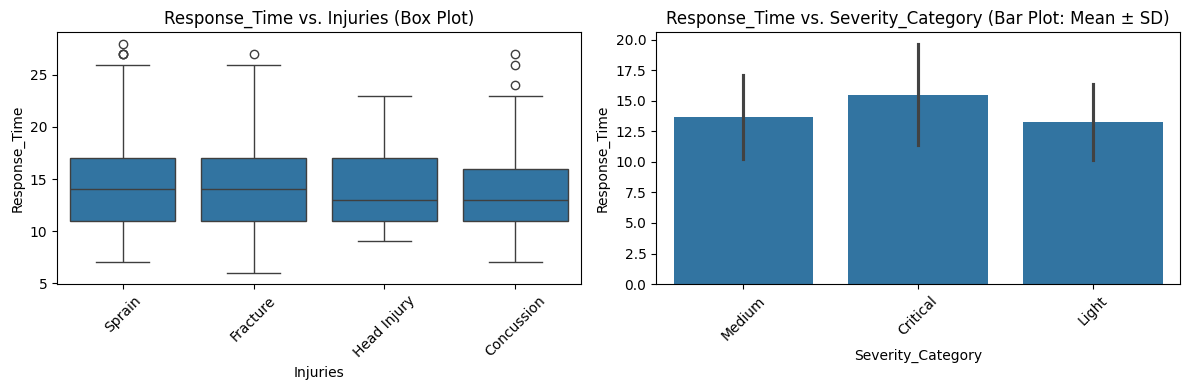

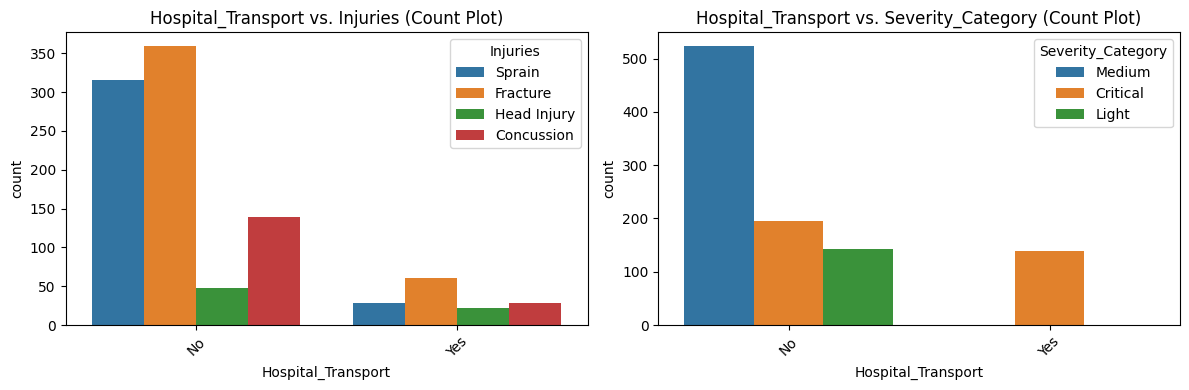

C:\Users\quydu\AppData\Local\Temp\ipykernel_18824\1814035779.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x="Severity_Category", y=col, data=incidents_df, estimator=np.mean, ci="sd", ax=axes[1])


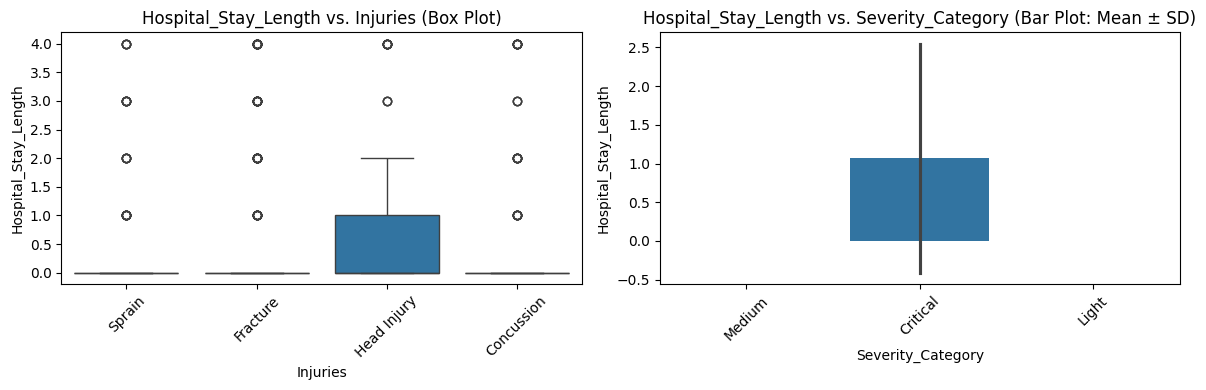

In [ ]:
excluded_cols = ["Incident_ID", "Customer_ID", "Injuries", "Severity_Category"]

# Identify which columns are numeric vs. categorical
numeric_cols = incidents_df.select_dtypes(include=[np.number]).columns
categorical_cols = incidents_df.select_dtypes(exclude=[np.number]).columns

for col in incidents_df.columns:
    if col not in excluded_cols:
        fig, axes = plt.subplots(ncols=2, figsize=(12, 4))
        
        # CASE 1: If the column is numeric
        if col in numeric_cols:
            # --- Left Subplot: Numeric vs. Injuries (Box Plot) ---
            sns.boxplot(x="Injuries", y=col, data=incidents_df, ax=axes[0])
            axes[0].set_title(f"{col} vs. Injuries (Box Plot)")
            axes[0].tick_params(axis='x', rotation=45)
            
            # --- Right Subplot: Numeric vs. Severity_Category (Bar Plot) ---
            # We'll plot the mean of the numeric column by each severity category
            sns.barplot(x="Severity_Category", y=col, data=incidents_df, estimator=np.mean, ci="sd", ax=axes[1])
            axes[1].set_title(f"{col} vs. Severity_Category (Bar Plot: Mean ± SD)")
            axes[1].tick_params(axis='x', rotation=45)
        
        # CASE 2: If the column is categorical
        elif col in categorical_cols:
            # --- Left Subplot: Categorical vs. Injuries (Count Plot) ---
            sns.countplot(x=col, hue="Injuries", data=incidents_df, ax=axes[0])
            axes[0].set_title(f"{col} vs. Injuries (Count Plot)")
            axes[0].tick_params(axis='x', rotation=45)
            
            # --- Right Subplot: Categorical vs. Severity_Category (Count Plot) ---
            sns.countplot(x=col, hue="Severity_Category", data=incidents_df, ax=axes[1])
            axes[1].set_title(f"{col} vs. Severity_Category (Count Plot)")
            axes[1].tick_params(axis='x', rotation=45)
        
        plt.tight_layout()
        plt.show()


#### 1. Season:
**Injuries:**
- No head injuries in winter but significantly more fractures and no concussion in summer

**Severity:**
- Medium has the most number of cases and is consistent year-round, but winter sees more critical and fewer light, which might mean winter activites (e.g., skiing, snowboarding) often lead to more severe injuries 


#### 2. Weather:
**Injuries:**
- fracture & sprain dominate under both Sunny and Windy conditions

**Severity:**
- Sunny and windy have most medium & critical. 

#### 3. Activity:
**Injuries:**
- fracture & sprain again appear most common in all activities. Head injuries only in climbing and concussions more frequent in skiing/ snowboarding

**Severity:**
- snowboarding shows only medium & critical, while skiing has a mix (including some light). Mountain biking is nearly as severe as skiing, and climbing ties skiing for critical cases

#### 4. Slope_Name:
**Injuries:**
- Summit Peak leads in overall injuries, but the difference from other slopes is not huge

**Severity:**
- Devil's Drop stands out for the most critical cases, while Summit Peak has the most medium. Other slopes hover around ~ 80 medium injuries, slightly fewer than Summit Peak


#### 5. Slope_Difficulty:
**Injuries:**
- fracture is top across all difficulties - interesting that even "Easy" slopes see fractures

**Severity:**
- advanced leads in medium injuries, expert leads in critical, which aligns with the idea that advanced/ expert terrain can produce more serious concerns

#### 6. Response Time:
**Injuries:**
- concussions have a narrower response-time range. 

**Severity:**
- critical shows the longest average wait time, which is concerning 

#### 7. Hospital Transport:
**Injuries:**
- fracture & sprain often do not require transport, indicating many can be managed on-site

**Severity:**
- Medium & Light rarely need transport, while critical injuries typically go to the hospital. A few critical cases remain on site


In [17]:
# 1) Crosstab of Season vs. Injuries
season_injuries_df = pd.crosstab(incidents_df["Season"], incidents_df["Injuries"])
print("=== Season vs. Injuries (crosstab) ===")
print(season_injuries_df)

# 2) Crosstab of Season vs. Severity_Category
season_severity_df = pd.crosstab(incidents_df["Season"], incidents_df["Severity_Category"])
print("\n=== Season vs. Severity_Category (crosstab) ===")
print(season_severity_df)

=== Season vs. Injuries (crosstab) ===
Injuries  Concussion  Fracture  Head Injury  Sprain
Season                                             
Summer             0       258           70     160
Winter           167       162            0     183

=== Season vs. Severity_Category (crosstab) ===
Severity_Category  Critical  Light  Medium
Season                                    
Summer                  117    108     263
Winter                  217     35     260


In [19]:
# 1) crosstab of Weather vs. Injuries
weather_injuries_df = pd.crosstab(incidents_df["Weather"], incidents_df["Injuries"])
print("=== Weather vs. Injuries (crosstab) ===")
print(weather_injuries_df)

# 2) crosstab of Weather vs. Severity_Category
weather_severity_df = pd.crosstab(incidents_df["Weather"], incidents_df["Severity_Category"])
print("\n=== Weather vs. Severity_Category (crosstab) ===")
print(weather_severity_df)

=== Weather vs. Injuries (crosstab) ===
Injuries  Concussion  Fracture  Head Injury  Sprain
Weather                                            
Foggy             48        42            0      56
Rainy              0        79           27      48
Snowy             45        46            0      39
Sunny             33       109           21      94
Windy             41       144           22     106

=== Weather vs. Severity_Category (crosstab) ===
Severity_Category  Critical  Light  Medium
Weather                                   
Foggy                    58     14      74
Rainy                    39     34      81
Snowy                    62      8      60
Sunny                    78     41     138
Windy                    97     46     170


In [20]:
# 1) crosstab of Activity vs. Injuries
activity_injuries_df = pd.crosstab(incidents_df["Activity"], incidents_df["Injuries"])
print("=== Activity vs. Injuries (crosstab) ===")
print(activity_injuries_df)

# 2) crosstab of Activity vs. Severity_Category
activity_severity_df = pd.crosstab(incidents_df["Activity"], incidents_df["Severity_Category"])
print("\n=== Activity vs. Severity_Category (crosstab) ===")
print(activity_severity_df)

=== Activity vs. Injuries (crosstab) ===
Injuries         Concussion  Fracture  Head Injury  Sprain
Activity                                                  
Climbing                  0        88           70       0
Hiking                    0        77            0      76
Mountain Biking           0        93            0      84
Skiing                   84        71            0      92
Snowboarding             83        91            0      91

=== Activity vs. Severity_Category (crosstab) ===
Severity_Category  Critical  Light  Medium
Activity                                  
Climbing                 98      0      60
Hiking                    6     65      82
Mountain Biking          13     43     121
Skiing                   94     35     118
Snowboarding            123      0     142


In [21]:
# 1) crosstab of Slope_Name vs. Injuries
slope_injuries_df = pd.crosstab(incidents_df["Slope_Name"], incidents_df["Injuries"])
print("=== Slope_Name vs. Injuries (crosstab) ===")
print(slope_injuries_df)

# 2) crosstab of Slope_Name vs. Severity_Category
slope_severity_df = pd.crosstab(incidents_df["Slope_Name"], incidents_df["Severity_Category"])
print("\n=== Slope_Name vs. Severity_Category (crosstab) ===")
print(slope_severity_df)

=== Slope_Name vs. Injuries (crosstab) ===
Injuries       Concussion  Fracture  Head Injury  Sprain
Slope_Name                                              
Blue Ridge             26        65            7      45
Bunny Hill             26        49           10      37
Devil’s Drop           24        57            9      51
Rocky Pass             21        59            9      49
Shadow Valley          21        53           14      44
Summit Peak            27        78            8      61
Thunder Run            22        59           13      56

=== Slope_Name vs. Severity_Category (crosstab) ===
Severity_Category  Critical  Light  Medium
Slope_Name                                
Blue Ridge               38     22      83
Bunny Hill               33     14      75
Devil’s Drop            108      0      33
Rocky Pass               34     23      81
Shadow Valley            38     26      68
Summit Peak              50     26      98
Thunder Run              33     32      85


In [22]:
# 1) crosstab of Slope_Difficulty vs. Injuries
slope_difficulty_injuries_df = pd.crosstab(incidents_df["Slope_Difficulty"], incidents_df["Injuries"])
print("=== Slope_Difficulty vs. Injuries (crosstab) ===")
print(slope_difficulty_injuries_df)

# 2) crosstab of Slope_Difficulty vs. Severity_Category
slope_difficulty_severity_df = pd.crosstab(incidents_df["Slope_Difficulty"], incidents_df["Severity_Category"])
print("\n=== Slope_Difficulty vs. Severity_Category (crosstab) ===")
print(slope_difficulty_severity_df)

=== Slope_Difficulty vs. Injuries (crosstab) ===
Injuries          Concussion  Fracture  Head Injury  Sprain
Slope_Difficulty                                           
Advanced                  49       137           21     117
Easy                      26        49           10      37
Expert                    45       110           23      95
Intermediate              47       124           16      94

=== Slope_Difficulty vs. Severity_Category (crosstab) ===
Severity_Category  Critical  Light  Medium
Slope_Difficulty                          
Advanced                 83     58     183
Easy                     33     14      75
Expert                  146     26     101
Intermediate             72     45     164


In [24]:
# 1) descriptive stats of response_time grouped by Injuries
response_time_injuries_stats = incidents_df.groupby("Injuries")["Response_Time"].describe()
print("=== Response_Time Descriptive Stats by Injuries ===")
print(response_time_injuries_stats)

# 2) descriptive stats of response_time grouped by Severity_Category
response_time_severity_stats = incidents_df.groupby("Severity_Category")["Response_Time"].describe()
print("\n=== Response_Time Descriptive Stats by Severity_Category ===")
print(response_time_severity_stats)

=== Response_Time Descriptive Stats by Injuries ===
             count       mean       std  min   25%   50%   75%   max
Injuries                                                            
Concussion   167.0  14.227545  3.872480  7.0  11.0  13.0  16.0  27.0
Fracture     420.0  14.240476  3.610748  6.0  11.0  14.0  17.0  27.0
Head Injury   70.0  14.214286  3.717927  9.0  11.0  13.0  17.0  23.0
Sprain       343.0  14.244898  3.891597  7.0  11.0  14.0  17.0  28.0

=== Response_Time Descriptive Stats by Severity_Category ===
                   count       mean       std  min   25%   50%   75%   max
Severity_Category                                                         
Critical           334.0  15.505988  4.111614  6.0  12.0  15.0  19.0  28.0
Light              143.0  13.279720  3.131857  8.0  11.0  13.0  15.0  27.0
Medium             523.0  13.690249  3.456855  7.0  11.0  13.0  16.0  27.0


In [25]:
# 1) crosstab of Hospital_Transport vs. Injuries
hospital_transport_injuries_df = pd.crosstab(incidents_df["Hospital_Transport"], incidents_df["Injuries"])
print("=== Hospital_Transport vs. Injuries (crosstab) ===")
print(hospital_transport_injuries_df)

# 2) crosstab of Hospital_Transport vs. Severity_Category
hospital_transport_severity_df = pd.crosstab(incidents_df["Hospital_Transport"], incidents_df["Severity_Category"])
print("\n=== Hospital_Transport vs. Severity_Category (crosstab) ===")
print(hospital_transport_severity_df)

=== Hospital_Transport vs. Injuries (crosstab) ===
Injuries            Concussion  Fracture  Head Injury  Sprain
Hospital_Transport                                           
No                         139       359           48     315
Yes                         28        61           22      28

=== Hospital_Transport vs. Severity_Category (crosstab) ===
Severity_Category   Critical  Light  Medium
Hospital_Transport                         
No                       195    143     523
Yes                      139      0       0
